<a href="https://colab.research.google.com/github/ingridmidory/Inferencia-Est-distica/blob/main/Tarea_5_Bootstrap%26SamplingMethods_MonterrosoAlfaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### PASO 1.  Importar de la página de la SS los datos actualizados
### hacer la descargar automáticamente 
#### https://buomsoo-kim.github.io/colab/2020/05/04/Colab-downloading-files-from-web-2.md/
!wget --timeout=300 --tries=1 "http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip"

--2021-12-14 17:20:15--  http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
Resolving datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)... 187.210.186.146
Connecting to datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)|187.210.186.146|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241794570 (231M) [application/x-zip-compressed]
Saving to: ‘datos_abiertos_covid19.zip’

datos_abiertos_covi 100%[===================>] 230.59M  1.53MB/s    in 3m 0s   

2021-12-14 17:23:15 (1.28 MB/s) - ‘datos_abiertos_covid19.zip’ saved [241794570/241794570]



In [ ]:
!ls

datos_abiertos_covid19.zip  sample_data


In [ ]:
#### PASO 2. Convertir a pandas el archibo Zip descagardo de la SS
#####
import pandas as pd
import zipfile

#pandas support zip file reads
covid = pd.read_csv("/content/datos_abiertos_covid19.zip", encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
len(covid)

12074161

In [ ]:
20000/11522912

0.001735672371706041

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##### Paso 4.  Aqui definimos los valores para los tamaños de las muestras
##### Cada valor de a[j] le corresponde una columna en el contenedor
range(1,23)
a =[10,50,100,500,1000,5000,7500,10000,20000,50000,75000,100000,125000,150000,175000,200000,250000,500000,750000,1000000,1250000,1500000,2000000]

In [ ]:
#Definición del contenedor
contenedor2019_media = pd.DataFrame(columns=[
    "trial",
    "n=5",
    "n=10",
    "n=15",
    "n=20",
    "n=50",
    "n=100",
    "n=150",
    "n=300",
    "n=600",
    "n=1000",
    "n=1500",
    "n=3000",
    "n=4000"
])

contenedor2019_desviacion = pd.DataFrame(columns=[
    "trial",
    "n=5",
    "n=10",
    "n=15",
    "n=20",
    "n=50",
    "n=100",
    "n=150",
    "n=300",
    "n=600",
    "n=1000",
    "n=1500",
    "n=3000",
    "n=4000"
])

contenedor2020_media = pd.DataFrame(columns=[
    "trial",
    "n=5",
    "n=10",
    "n=15",
    "n=20",
    "n=50",
    "n=100",
    "n=150",
    "n=300",
    "n=600",
    "n=1000",
    "n=1500",
    "n=3000",
    "n=4000"
])

contenedor2020_desviacion = pd.DataFrame(columns=[
    "trial",
    "n=5",
    "n=10",
    "n=15",
    "n=20",
    "n=50",
    "n=100",
    "n=150",
    "n=300",
    "n=600",
    "n=1000",
    "n=1500",
    "n=3000",
    "n=4000"
])
for i in range(250):
    contenedor2019_media.loc[i] = [i+1] + 13*[0]
    contenedor2020_media.loc[i] = [i+1] + 13*[0]
    contenedor2019_desviacion.loc[i] = [i+1] + 13*[0]
    contenedor2020_desviacion.loc[i] = [i+1] + 13*[0]

In [ ]:
#Creación de las muestras
for j in range(13):
    for i in range(250):
        m2019 = datos2019.sample(a[j])
        m2020 = datos2020.sample(a[j])
        media2019 = m2019["Centro PM10"].mean()
        media2020 = m2020["Centro PM10"].mean()
        desviacion2019 = m2019["Centro PM10"].std()
        desviacion2020 = m2020["Centro PM10"].std()


        contenedor2019_media.iloc[[i],[j+1]] = media2019
        contenedor2020_media.iloc[[i],[j+1]] = media2020
        contenedor2019_desviacion.iloc[[i],[j+1]] = desviacion2019
        contenedor2020_desviacion.iloc[[i],[j+1]] = desviacion2020

NameError: ignored

In [ ]:
####  OJO.  Tarda aproximadamente 3 horas!!!

#### Paso 5. Extraer 500 muestras de tamaño a[j] cada una
####  5.2 Calcular la proporcion de positivos con respecto al total
####  5.3 Almacenar este valor en una celda del contenedor
####  5.4 En total, el contenedor tendra 500*23 valores posibles de proporciones de positivos

### df.loc[df['column_name'] == some_value]

for j in range(1, 23):
  for i in range(len(contenedor2019_media)):
    ### 1 seleccionar la muestra
    n= covid.sample(a[j])

    ### 2 filtrar los positivos
    ### df.loc[df['column_name'] == some_value]
    nPositivos=n.loc[n["RESULTADO_LAB"]==1]

    ### 3 calcular la proporcion para la muesta n
    p=len(nPositivos)/len(n)
    print(p)

    ### 4 escribir la proporcion en el contenedor
    ### df.iloc[[Row],[Col]] 'Name'
    contenedor2019_media.iloc[[i],[j]]=p


0.2
0.2
0.12
0.12
0.16
0.18
0.28
0.1
0.16
0.14
0.22
0.26
0.28
0.16
0.12
0.16
0.2
0.18
0.16
0.14
0.16
0.24
0.18
0.24
0.18
0.18
0.18
0.12
0.14
0.22
0.18
0.14
0.18
0.14
0.12
0.26
0.24
0.2
0.14
0.28
0.16
0.2
0.22
0.2
0.14
0.1
0.14
0.12
0.04
0.1
0.2
0.28
0.18
0.22
0.22
0.18
0.14
0.28
0.22
0.16
0.18
0.16
0.22
0.12
0.26
0.12
0.18
0.1
0.3
0.22
0.1
0.26
0.18
0.18
0.16
0.18
0.18
0.14
0.16
0.16
0.22
0.12
0.22
0.2
0.14
0.04
0.18
0.2
0.22
0.06
0.26
0.12
0.16
0.2
0.16
0.12
0.24
0.12
0.24
0.1
0.2
0.12
0.24
0.2
0.18
0.12
0.1
0.28
0.08
0.12
0.18
0.12
0.14
0.18
0.1
0.16
0.18
0.22
0.18
0.16
0.12
0.12
0.16
0.2
0.22
0.14
0.18
0.18
0.06
0.2
0.32
0.16
0.14
0.18
0.22
0.14
0.24
0.16
0.18
0.22
0.32
0.22
0.28
0.12
0.18
0.16
0.18
0.1
0.22
0.24
0.16
0.18
0.16
0.22
0.2
0.08
0.16
0.1
0.22
0.16
0.24
0.08
0.26
0.08
0.1
0.22
0.18
0.16
0.04
0.1
0.18
0.16
0.2
0.24
0.22
0.28
0.1
0.22
0.16
0.12
0.12
0.06
0.12
0.14
0.12
0.04
0.08
0.1
0.18
0.12
0.12
0.2
0.08
0.16
0.2
0.26
0.2
0.16
0.16
0.08
0.26
0.24
0.16
0.16
0.18
0.12
0.24

IndexError: ignored

In [ ]:
contenedor2019_media.head()

NameError: ignored

In [ ]:
#### PASO 6. Calcular la media de cada columna
medias2019 = []
medias2020 = []
desv2019 = []
desv2020 = []
for j in range(1,14):
    medias2019.append(contenedor2019_media.iloc[:,j].mean())
    medias2020.append(contenedor2020_media.iloc[:,j].mean())
    desv2019.append(contenedor2019_media.iloc[:,j].std())
    desv2020.append(contenedor2020_media.iloc[:,j].std())

NameError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


<Figure size 432x288 with 0 Axes>

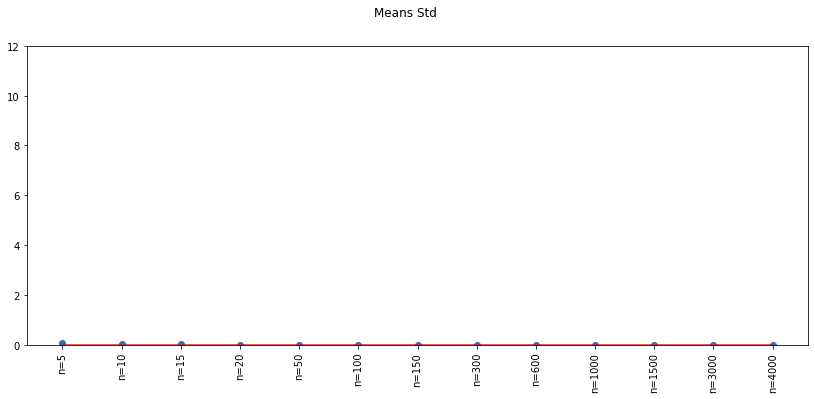

In [ ]:
#### PASO 7. Generación de gráfico de desviación estándar de las medias.
import matplotlib.pyplot as plt
etiquetas=list(contenedor2019_media.columns[1:14])
x = list(range(13))
y = desv2019

plt.figure()
plt.figure(figsize=(14,5.5))
plt.suptitle('Means Std')
plt.ylim(0, 12)
plt.xticks(x, etiquetas, rotation=90)

plt.stem(x, y)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

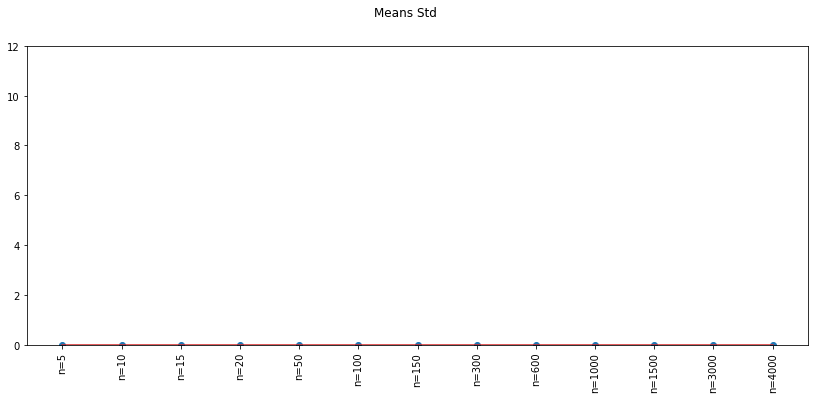

In [ ]:
import matplotlib.pyplot as plt
etiquetas=list(contenedor2020_media.columns[1:14])
x = list(range(13))
y = desv2020

plt.figure()
plt.figure(figsize=(14,5.5))
plt.suptitle('Means Std')
plt.ylim(0, 12)
plt.xticks(x, etiquetas, rotation=90)

plt.stem(x, y)
plt.show()

In [ ]:
print(medias2019)
print(medias2020)

[0.1755199999999999, 0.16787999999999997, 0.012335999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
print(desv2019)
print(desv2020)


[0.05506412472132197, 0.03572408769677776, 0.04458265983802371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Conclusiones:

El tamaño optimo de la muestra esta dado por menor desviación estándar.  De acuerdo a la figura anterior, se prefieren muestras de  tamaño n=20,000 (Esto es el 0.74% del tamaño de la población).